In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [79]:
'''
"This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default"
'''

'\n"This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:\n\nX1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.\n\nX2: Gender (1 = male; 2 = female).\n\nX3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).\n\nX4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).\n\nX5: Age (year).\n\nX6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:\n\n-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment de

In [80]:
df = pd.read_csv(r"C:\Users\furkanbaba\Desktop\furkanbaba\coding\Credit-Card-Default-Prediction\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [81]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [83]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [84]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [85]:
df["PAY_4"].value_counts()

PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

In [86]:
df[24:25]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
24,25,90000.0,1,1,2,23,0,0,0,-1,...,5398.0,6360.0,8292.0,5757.0,0.0,5398.0,1200.0,2045.0,2000.0,0


In [87]:
gender_grouped = df.groupby('SEX')['LIMIT_BAL'].mean()
print(gender_grouped)

SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64


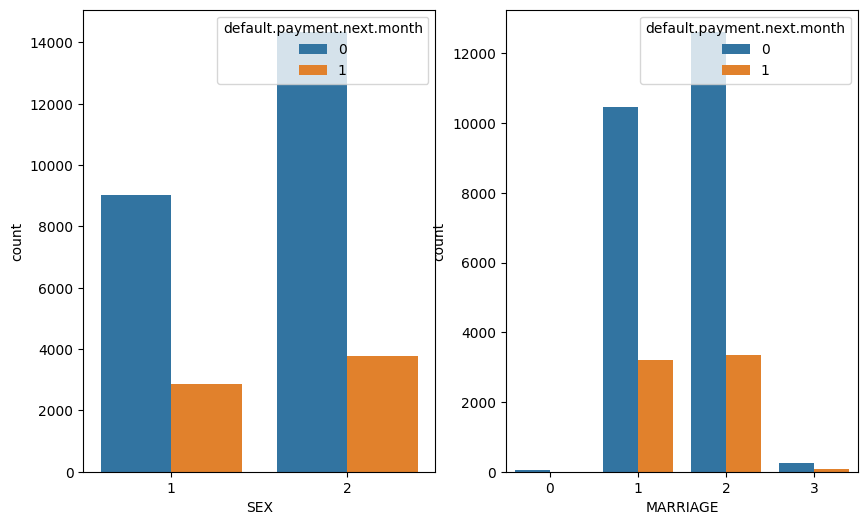

In [88]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="SEX", hue="default.payment.next.month",data=df)

plt.subplot(1,2,2)

sns.countplot(x="MARRIAGE",hue="default.payment.next.month",data=df)
plt.show()

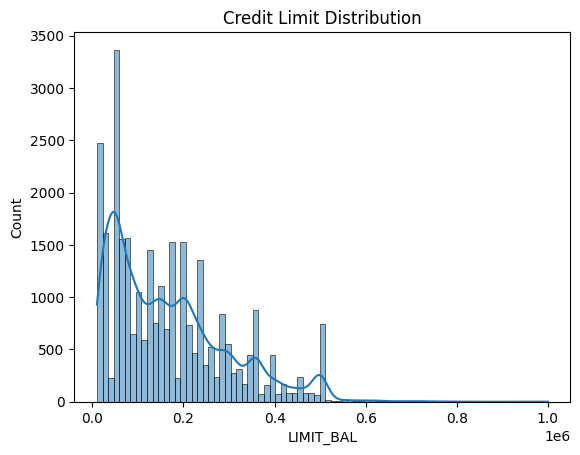

In [89]:
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Credit Limit Distribution')
plt.show()

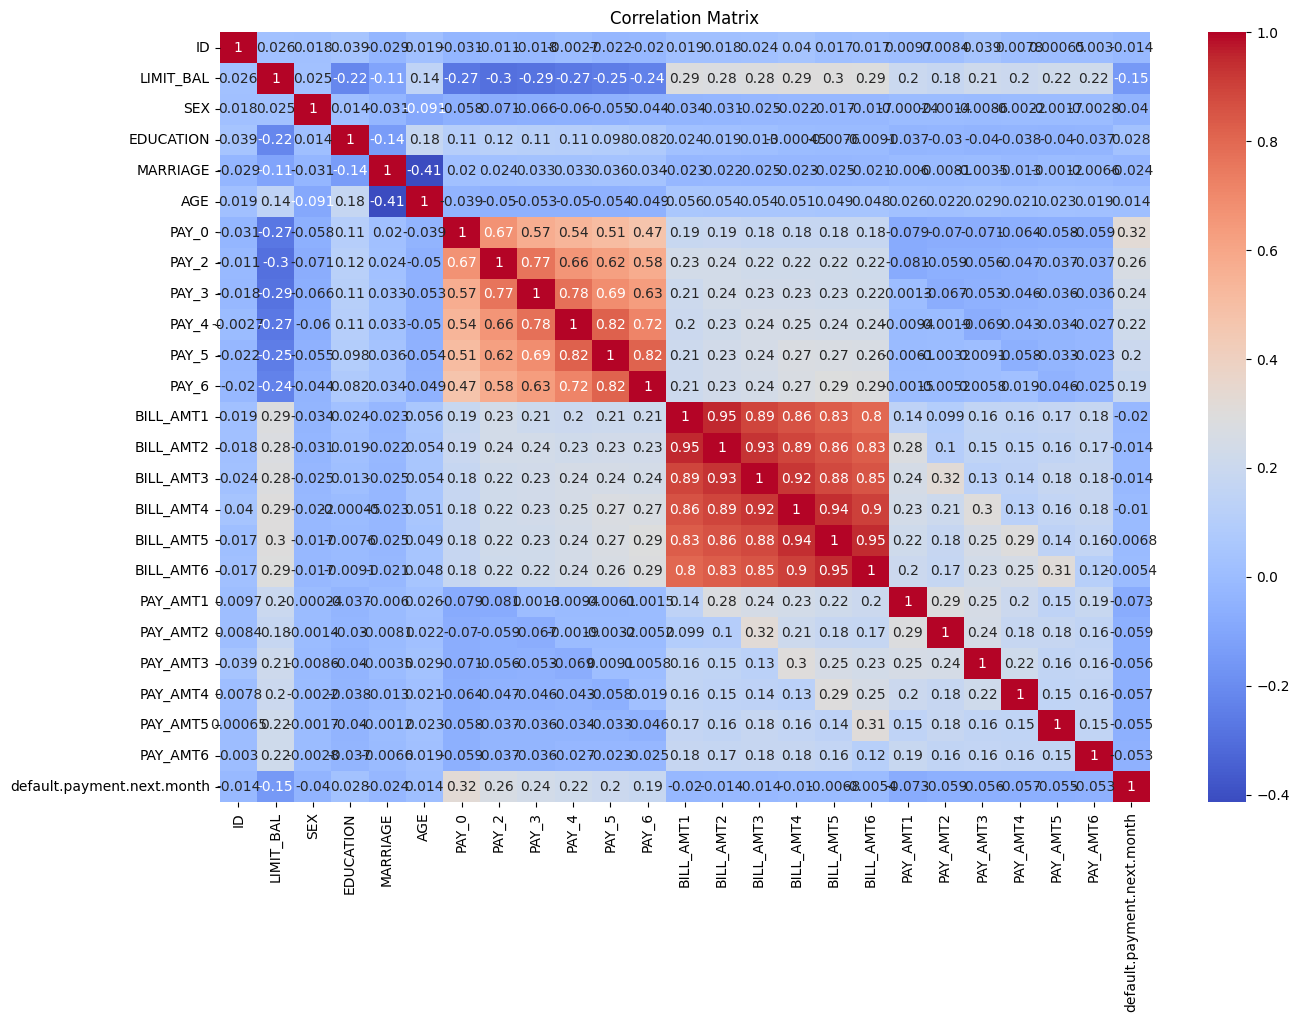

In [90]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [91]:
df["AGE"].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

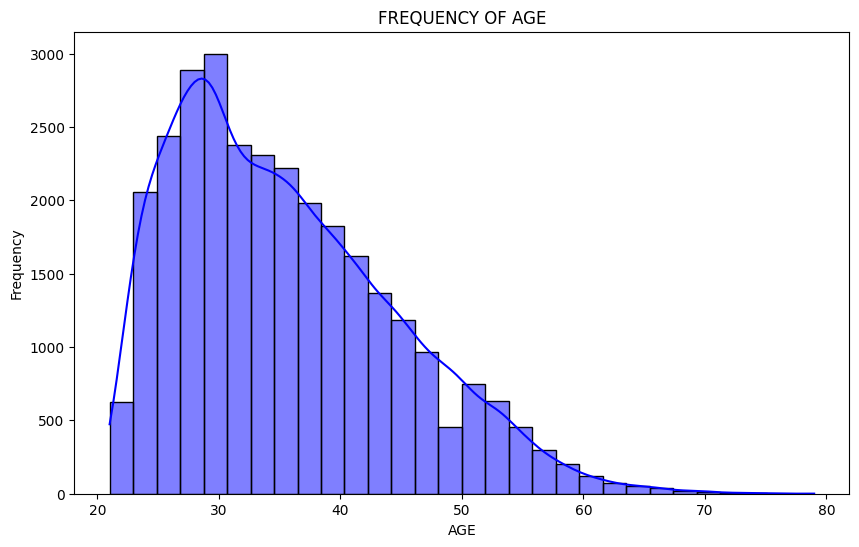

In [92]:
# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.histplot(df["AGE"], kde=True, color='blue', bins=30)
plt.title('FREQUENCY OF AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')


plt.show()

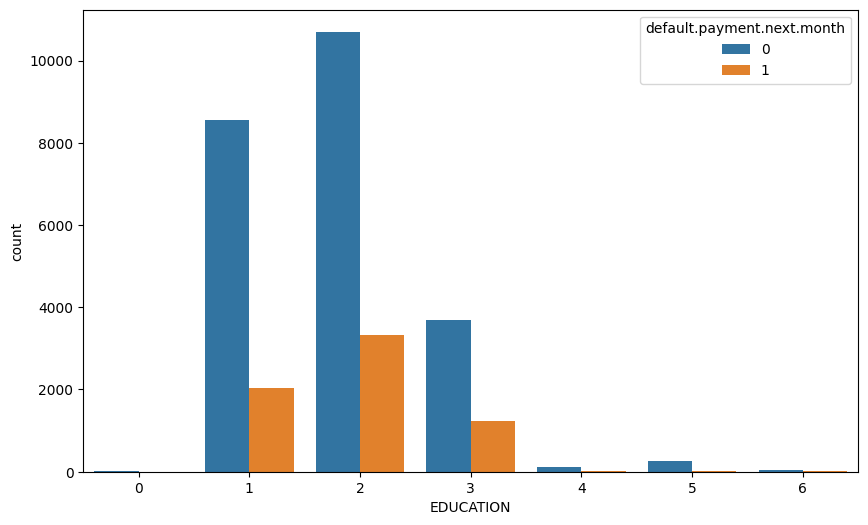

In [93]:
plt.figure(figsize=(10,6))

sns.countplot(x="EDUCATION", hue="default.payment.next.month",data=df)

plt.show()

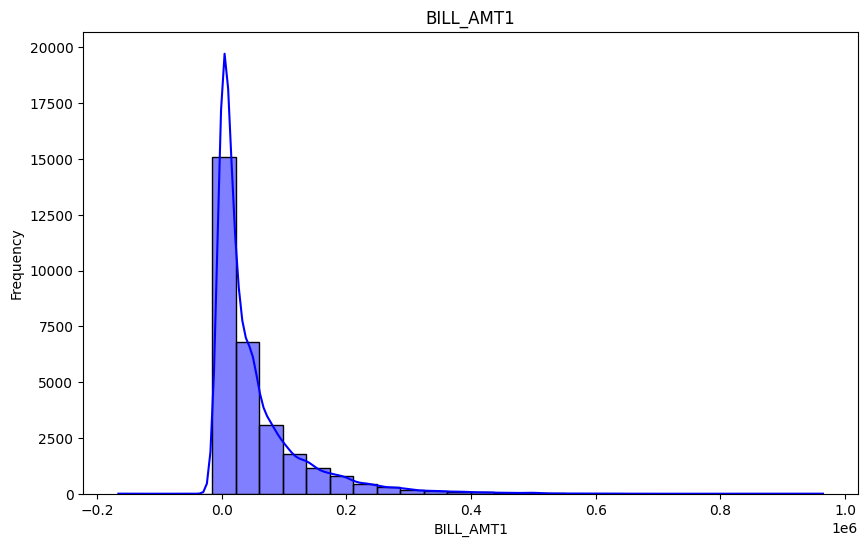

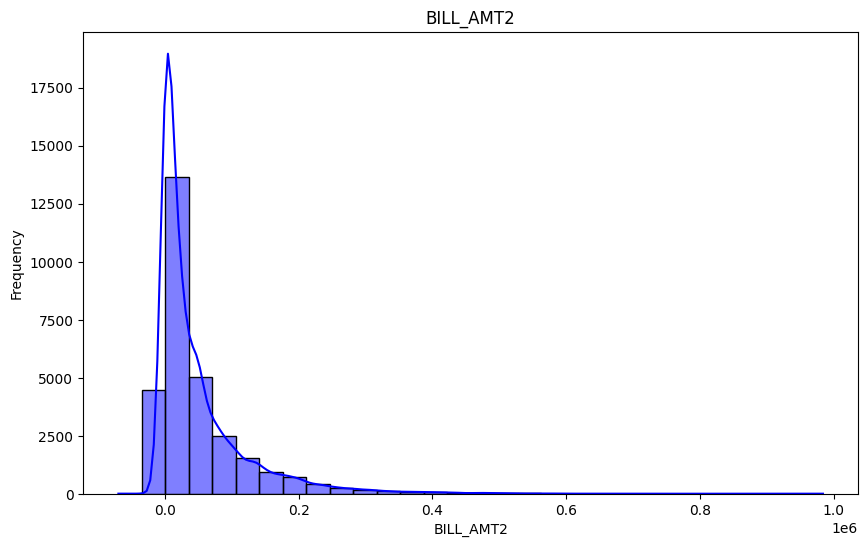

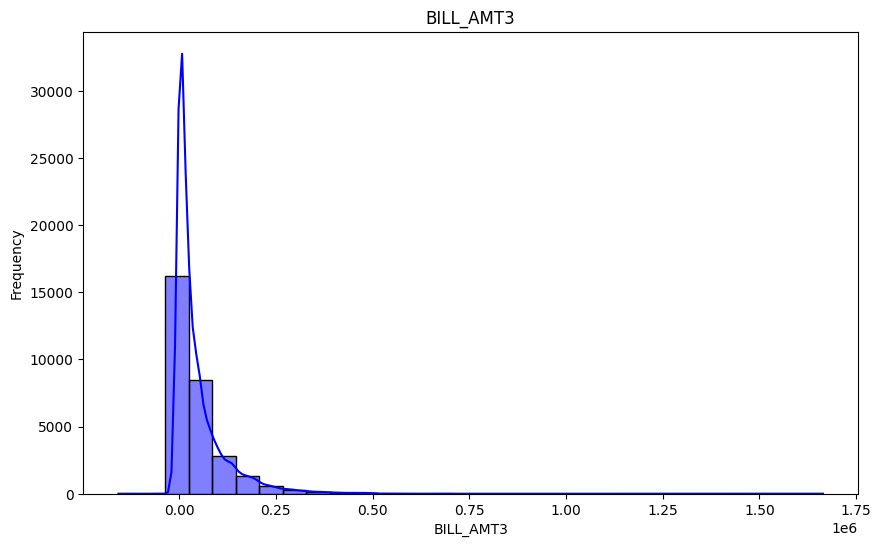

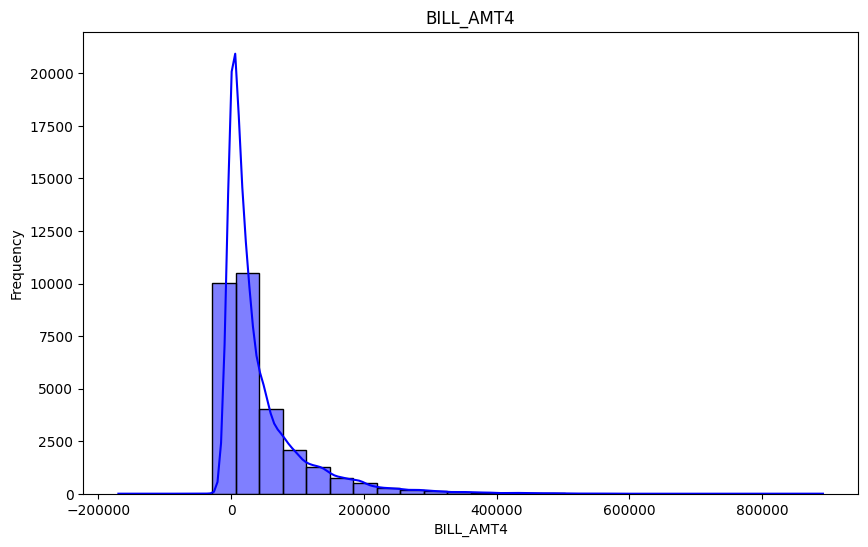

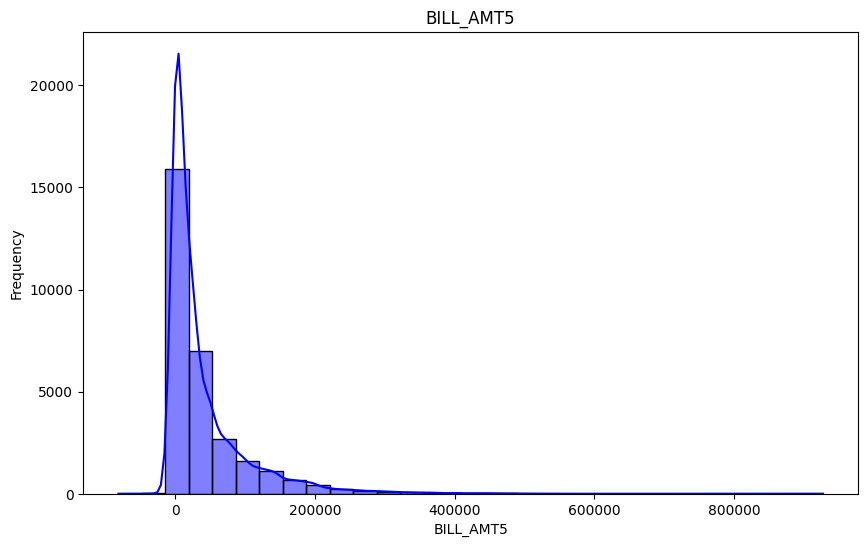

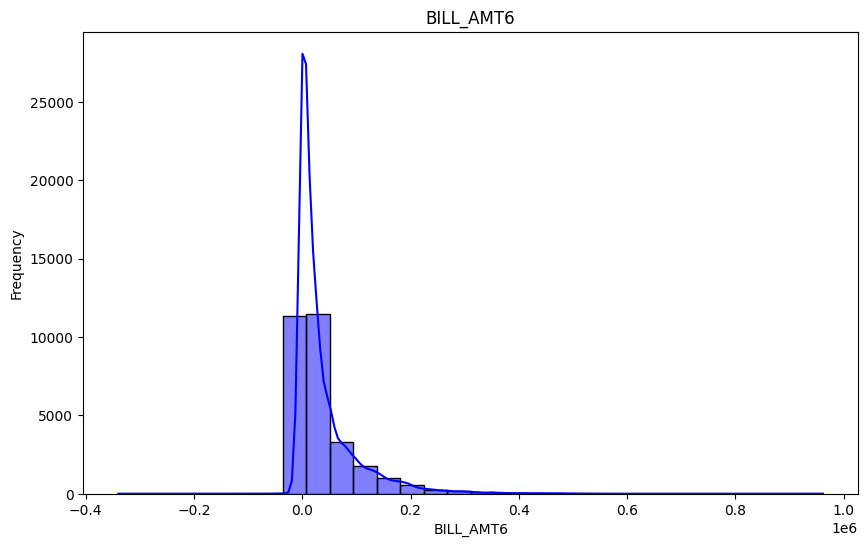

In [94]:
bill_columns = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]

for i in bill_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[i], kde=True, color='blue', bins=30)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


In [95]:
from scipy.stats import ttest_ind

male_credit = df[df['SEX'] == 1]['LIMIT_BAL']
female_credit = df[df['SEX'] == 2]['LIMIT_BAL']
t_stat, p_value = ttest_ind(male_credit, female_credit)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -4.288903937895566, P-value: 1.8011800666712653e-05


In [96]:
X = df.drop(columns=["default.payment.next.month"], axis=1)

In [97]:
y = df["default.payment.next.month"]
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [98]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features)     
    ]
)
X = preprocessor.fit_transform(X)


In [99]:
X.shape

(30000, 24)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((24000, 24), (6000, 24))

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    conf_matrix = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, conf_matrix


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Modeli eğit
    
    # Tahmin yap
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Eğitim ve Test veri setlerini değerlendirme
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1, train_conf_matrix = evaluate_classification_model(y_train, y_train_pred)
    
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1, test_conf_matrix = evaluate_classification_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performansı Eğitim seti için')
    print("- Doğruluk: {:.4f}".format(model_train_accuracy))
    print("- Kesinlik: {:.4f}".format(model_train_precision))
    print("- Hatırlama: {:.4f}".format(model_train_recall))
    print("- F1 Skoru: {:.4f}".format(model_train_f1))
    print('Karmaşıklık Matrisi:')
    print(train_conf_matrix)
    
    print('----------------------------------')
    
    print('Model performansı Test seti için')
    print("- Doğruluk: {:.4f}".format(model_test_accuracy))
    print("- Kesinlik: {:.4f}".format(model_test_precision))
    print("- Hatırlama: {:.4f}".format(model_test_recall))
    print("- F1 Skoru: {:.4f}".format(model_test_f1))
    print('Karmaşıklık Matrisi:')
    print(test_conf_matrix)
    
    accuracy_list.append(model_test_accuracy)
    
    print('='*35)
    print('\n')


Logistic Regression
Model performansı Eğitim seti için
- Doğruluk: 0.8106
- Kesinlik: 0.7956
- Hatırlama: 0.8106
- F1 Skoru: 0.7720
Karmaşıklık Matrisi:
[[18165   512]
 [ 4033  1290]]
----------------------------------
Model performansı Test seti için
- Doğruluk: 0.8100
- Kesinlik: 0.7918
- Hatırlama: 0.8100
- F1 Skoru: 0.7713
Karmaşıklık Matrisi:
[[4550  137]
 [1003  310]]


K-Neighbors Classifier
Model performansı Eğitim seti için
- Doğruluk: 0.8438
- Kesinlik: 0.8333
- Hatırlama: 0.8438
- F1 Skoru: 0.8302
Karmaşıklık Matrisi:
[[17774   903]
 [ 2846  2477]]
----------------------------------
Model performansı Test seti için
- Doğruluk: 0.7958
- Kesinlik: 0.7731
- Hatırlama: 0.7958
- F1 Skoru: 0.7778
Karmaşıklık Matrisi:
[[4316  371]
 [ 854  459]]


Decision Tree
Model performansı Eğitim seti için
- Doğruluk: 1.0000
- Kesinlik: 1.0000
- Hatırlama: 1.0000
- F1 Skoru: 1.0000
Karmaşıklık Matrisi:
[[18677     0]
 [    0  5323]]
----------------------------------
Model performansı Test set